In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from datetime import datetime
import csv


font_path = "NanumBarunGothic-YetHangul.otf"
FILE_PATH = "MYROOM.TXT"

# FILE = open(FILE_PATH, 'r')
# FILE

with open(FILE_PATH, "r") as f:
    data = f.readlines()
FILE = data

# print(FILE)

data_list = []

for item in FILE:
    item = item.replace("\n", "")
    item = item.split()
    temp = f"{item[0]} {item[1]}"
    item.insert(0, temp)
    temp = [">>", item[1], item[2]]
    for i in temp:
        index = item.index(i)
        item.pop(index)

    # print(temp)
    data_list.append(item)
    # print(item)
# print(data_list)

# df = pd.DataFrame
print(data_list[0])
MAX = len(data_list)
print(f"Max Length >> {MAX}")

FileNotFoundError: [Errno 2] No such file or directory: 'MYROOM.TXT'

In [ ]:
df = pd.DataFrame(data_list)

# ["Date", "Time", "Temperature", "Humidity", "Voltage", "DustDensity"]
# df.columns(["Date", "Time", "Temperature", "Humidity", "Voltage", "DustDensity"])
df.rename(
    columns={
        0: "Date",
        # 1: "Time",
        1: "Temperature",
        2: "Humidity",
        3: "Voltage",
        4: "DustDensity",
    },
    inplace=True,
)

# df.astype({"Date": ""})
# df.astype({"Temperature": "int"}, inplace=True)
df = df.astype(
    {
        "Temperature": "int",
        "Humidity": "float",
        "Voltage": "float",
        "DustDensity": "float",
    }
)

df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y %H:%M:%S")
# df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S")
# df["Temperature"] = df["Temperature"].astype(int)  # int to float
# df['키'] = df['키'].astype(int)       # float to int

df.set_index("Date", inplace=True)

print(df.info())
print(df.head())
df.dtypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844 entries, 2023-12-24 01:32:00 to 2023-12-25 12:01:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  844 non-null    int64  
 1   Humidity     844 non-null    float64
 2   Voltage      844 non-null    float64
 3   DustDensity  844 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 33.0 KB
None
                     Temperature  Humidity  Voltage  DustDensity
Date                                                            
2023-12-24 01:32:00           22      43.0     0.82        44.06
2023-12-24 01:33:00           22      43.0     0.82        44.06
2023-12-24 01:34:00           22      44.0     0.82        43.09
2023-12-24 01:36:00           22      44.0     0.81        42.11
2023-12-24 01:40:00           21      44.0     0.82        44.06


Temperature      int64
Humidity       float64
Voltage        float64
DustDensity    float64
dtype: object

In [ ]:
df

,Temperature,Humidity,Voltage,DustDensity
Date,,,,
2023-12-24 01:32:00,22,43.0,0.82,44.06
2023-12-24 01:33:00,22,43.0,0.82,44.06
2023-12-24 01:34:00,22,44.0,0.82,43.09
2023-12-24 01:36:00,22,44.0,0.81,42.11
2023-12-24 01:40:00,21,44.0,0.82,44.06
...,...,...,...,...
2023-12-25 11:55:00,18,47.0,0.83,46.99
2023-12-25 11:57:00,18,47.0,0.83,45.04
2023-12-25 11:58:00,18,47.0,0.83,46.99


In [ ]:
print(df.isnull().sum())

# ###################

# df = df.fillna(method="pad", axis=0)
# # df = df.fillna(df.interpolate(), axis=0)


# # print(df)
# df.to_csv("MYROOM.csv")
# ###################

# print(df.isnull().sum())

Temperature    0
Humidity       0
Voltage        0
DustDensity    0
dtype: int64


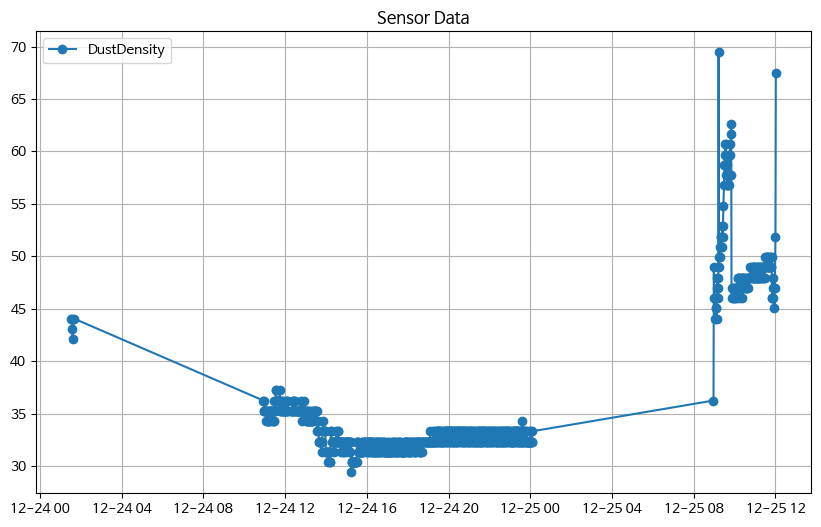

In [94]:
plt.figure(figsize=(10, 6))

# fig, ax1 = plt.subplots()
# # ax1.plot(x, y1, color = 'red', alpha = 0.5)
# plt.plot(df.index, df["Temperature"], label="Temperature", marker="o", color="red")
# # y축 라벨 및 범위 지정
# ax1.set_ylabel("y1", color="red", rotation=0)
# # ax1.set_ylim(0, 15)

# ax2 = ax1.twinx()
# # ax2.plot(x, y2, color="blue", alpha=0.5)
# plt.plot(df.index, df["Humidity"], label="Humidity", marker="o")
# # y축 라벨 및 범위 지정
# ax2.set_ylabel("y2", color="blue", rotation=0)
# # ax2.set_ylim(0, 2500)


# plt.plot(df.index, df["Temperature"], label="Temperature", marker="o")
# plt.plot(df.index, df["Humidity"], label="Humidity", marker="o")
# # plt.plot(df.index, df["Voltage"], label="Voltage", marker="o")
plt.plot(df.index, df["DustDensity"], label="DustDensity", marker="o")

plt.title("Sensor Data")
# plt.xlabel("Time")
# plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()